## 군집(클러스터링)
- 유사성이 높은 대상의 집단을 분류하는 분석방법
    - 레이블이 없는 상태에서 분류
- 계층적 군집분석과 비계층적 군집분석
    - 전통적인 계층적 군집분석은 군집의 개수가 나중에 선정됨.
    - 비계층적 군집분석인 K-means는 군집의 수를 먼저 선정함.
    - K-means 군집분석은 초기 중심값은 임의로 선정하며, 중심 값이 이동함.
- 군집분석의 평가지표
    - Silhouette(실루엣), Dunn index 등
    
###  군집분석을 설명한 자료
https://www.youtube.com/watch?v=kijaeEGhcUY&list=PLalb9l0_6WAop2FpP4kFIOfhVSn2FN7RZ&index=3

   

## 비계층적 군집분석
- 대표적인 방법 K-means
- K-평균군집(cnetroid): 임의의 지점 K개를 선택하여 해당 중심에서 가까운 데이터를 군집화하는 기법
- n_clusters 하이퍼파라미터 반드시 설정

In [16]:
# KMeans 라이브러리
from sklearn.cluster import KMeans
import pandas as pd

# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [17]:
# KMeans 선언 및 학습
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [18]:
# KMeans 예측
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [19]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


## 설명
target와 pred가 완전 다른데?
클러스터링할 때 라벨은 KMeans가 알아서 붙이기 때문.
같을거라 기대하지 마라.

## PCA -> 군집 -> 시각화

In [28]:
# PCA
from sklearn.decomposition import PCA

df = data.copy()
pca = PCA(n_components = 2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [29]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


In [31]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_
centers

array([[ -18.48419282,    4.20263004],
       [ 448.29677492,   -2.2569996 ],
       [-288.75258647,   -2.23889973]])

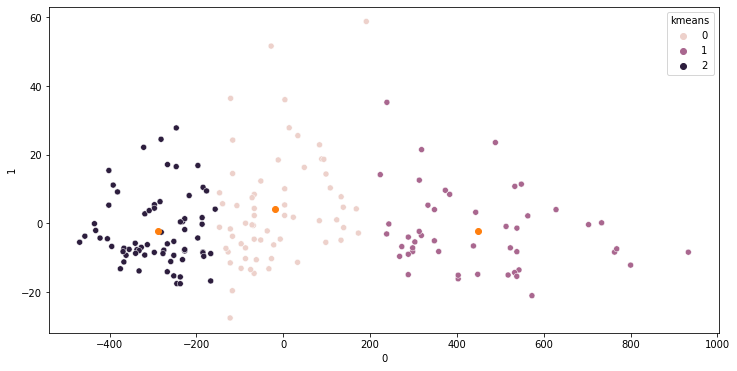

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.scatterplot(x = df.iloc[:, 0], y = df.iloc[:, 1], hue = df['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

## 클러스터 갯수 찾는 방법(엘보우 방법: elbow method)
- 시각화를 시켜서 군집수 추정
- inertia는 클러스터내의 샘플간의 거리의 합을 의미함.
- 아래 그림에서 기울기가 급격히 줄어드는 지점(3, 4)


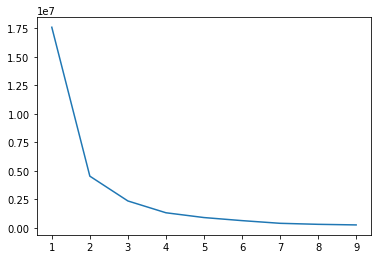

In [41]:
# 군집 수 찾기

df = data.copy()
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia)

## 계층적 군집분석
- k-means와 달리 군집 개수를 사전에 지정하지 않음
- 덴드로그램

> 아래 예제는 target 1,2,3인 데이터를 각각 3개씩 가져와서 dendrogram으로 어떻게 군집되는지 실행해 보는 것임.

In [42]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [44]:
# PCA
df = data.copy()
pca = PCA(n_components = 2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [52]:
# 데이터 샘플링
# target을 보고 0,1,2 데이터 중 3개씩 가져옴.
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata


,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


In [49]:
dataset.target[:3]

array([0, 0, 0])

In [47]:
dataset.target[70:73]

array([1, 1, 1])

In [48]:
dataset.target[160:163]

array([2, 2, 2])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411471362, 30.991512411471362, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.991512411471362],
  [0.0, 48.02737852215087, 48.02737852215087, 0.0],
  [0.0, 88.07194000276101, 88.07194000276101, 48.02737852215087],
  [0.0, 135.87135248973354, 135.87135248973354, 88.07194000276101],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973354,
   461.0158736911475,
   461.0158736911475,
   190.03011431770972],
  [147.877877959848, 1026.396544382853, 1026.396544382853, 461.0158736911475]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C

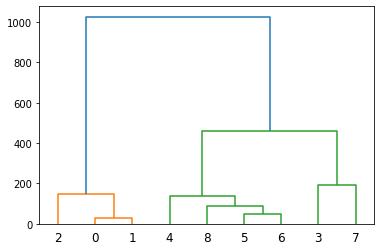

In [55]:
# 덴드로그램
linkage = ward(kdata)
dendrogram(linkage)

## 설명
0,1,2 : 잘됨
3 : 잘못 들어감
5, 6 : 잘못 들어감?
눈으로 보면서 클러스터링?
결론은 안나왔다.

In [56]:
# Q. 저번 스텝의 퀴즈에 이어서 target의 1,2 값은 각각 pred의 어떤 숫자와 매칭이 되어야할 지 찾아주세요.
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)

df['target'] = dataset.target
df['pred'] = pred
# size함수는 group별로 항목의 갯수를 return한다.
df.groupby(['target', 'pred']).size()


target  pred
0       0       13
        1       46
1       0       20
        1        1
        2       50
2       0       29
        2       19
dtype: int64